# Working with Text Data - Preprocessing and Text to Numerical Vector

# Text Data

Text Analysis is a major application field for machine learning algorithms. Some of the major application areas of NLP are:

    1.Spell Checker, Keyword Search, etc
    2.Sentiment Analysis, Spam Classification
    3.Machine Translation
    4.Chatbots/Dialog Systems
    5.Question Answering Systems
    
etc..

However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

# Why NLP is hard?


    1.Complexity of representation
    2.Ambiguity in Natural Language

# Text Preprocessing

    1.Tokenisation
    2.Removing special characters
    3.Convert sentence into lower case
    4.Removing stop words
    5.Stemming or Lemmatization

# Techniques to convert Text to Numerical Vectors

    1.Bag of Words
    2.TF IDF (Term Frequency - Inverse Document Frequency)
    3.Word2Vec (by Google)
    4.GloVe (Global Vectors by Stanford) - Not Covered in this notebook
    5.Pretrained GloVe Embeddings
    6.FastText (by Facebook) - Not Covered in this notebook
    7.ELMo (Embeddings from Language Models) - Not Covered in this notebook
    8.BERT (Bidirectional Encoder Representations from Transformer)

# Data Preparation

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lst_text = ['it Was the best oF Times $', 
            'It was The worst of times.',
            'IT 9 was tHe age Of wisdom', 
            'it was thE age of foolishness']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was the best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of foolishness


In [4]:
# !pip install nltk

In [5]:
import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bagal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bagal\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bagal\AppData\Roaming\nltk_data...


True

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [8]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

# Text Preprocessing Steps

Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

    1.Removing Special Characters and Punctuation

    2.Converting to Lower Case - We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

    3.Removing Stop Words - Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

    4.Stemming or Lemmatization - Stemming is the process of getting the root form of a word. For eg: warm, warmer, warming can be converted to warm.

In [9]:
raw_text = "This 1is Natural-LAnguage-Processing."
print(raw_text)

This 1is Natural-LAnguage-Processing.


In [10]:
# Removing special characters and digits
sentence = re.sub("[^a-zA-Z]", " ", raw_text)
print(sentence)

This  is Natural LAnguage Processing 


In [11]:
# change sentence to lower case
sentence = sentence.lower()
print(sentence)

this  is natural language processing 


In [12]:
# tokenize into words
tokens = sentence.split()
print(tokens)

['this', 'is', 'natural', 'language', 'processing']


In [13]:
# Removing stop words
clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
print(clean_tokens)

['natural', 'language', 'processing']


In [14]:
# Stemming
clean_tokens_stem = [stemmer.stem(word) for word in clean_tokens]
print(clean_tokens_stem)

['natur', 'languag', 'process']


In [15]:
# Lemmatizing
clean_tokens_lem = [lemmatizer.lemmatize(word) for word in clean_tokens]
print(clean_tokens_lem)

['natural', 'language', 'processing']


# Lets put it all together

In [16]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [17]:
temp_df = df['text'].apply(lambda x : preprocess(x, 'stem'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [18]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [19]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem
0,it Was the best oF Times $,best time,2
1,It was The worst of times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE age of foolishness,age foolish,2


In [20]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [21]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [22]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


# Bag of Word Representation

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer to convert text into a matrix of token count

Bag of Words: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Code Example: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

We are going to perform below mentioned steps to understand the entire process:

    a. Converting text to numerical vectors with the help of CountVectorizer
    b. Understand fit and transform
    c. Looking at vocabulary_
    d. Converting sparse matrix to dense matrix using toarray()
    e. Understanding n_gram

# Advantages

    1.It is simple to understand and implement like OneHotEncoding.

    2.We have a fixed length encoding for any sequence of arbitrary length.

    3.Documents with same words/vocabulary will have similar representation. So if two documents have a similar vocabulary, they’ll be closer to each other in the vector space and vice versa.

# Disadvantages

    1.The size of vector increases with the size of the vocabulary. Thus, sparsity continues to be a problem. One way to control it is by limiting the vocabulary to n number of the most frequent words.
    
    2.It does not capture the similarity between different words that mean the same thing. i.e. Semantic Meaning is not captured.
        a. "walk", "walked", and "walking". BoW vectors of all three tokens will be equally apart.
        b. "search" and "explore" are synonyms. BoW won't capture the semantic similarity of these words.
        
    3.This representation does not have any way to handle out of vocabulary (OOV) words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).
    
    4.As the name indicates, it is a “bag” of words. Word order information is lost in this representation. One way to control it is by using n-grams.
    
    5.It suffers from curse of high dimensionality.

In [23]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


In [24]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

dtm = vocab.fit_transform(df['clean_text_lemma'])

# fit_transform() could be done seperatly as mentioned below
# vocab.fit(df.clean_text_stem)
# dtm = vocab.transform(df.clean_text_stem)

In [25]:
# We can look at unique words by using 'vocabulary_'

vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}

In [26]:
# Observe that the type of dtm is sparse

print(type(dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [27]:
# Lets now print the  shape of this dtm

print(dtm.shape)

# o/p -> (4, 6)
# i.e -> 4 documents and 6 unique words

(4, 6)


In [28]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,1)    1
# Here (0, 1) means 0th document and 1st(index starting from 0) unique word. 
# (we have total 4 documents) & (we have total 6 unique words)
# (0, 1)    1 -> 1 here refers to the number of occurence of 1st word
# Now lets read it all in english.
# (0, 1)    1 -> 'times' occurs 1 time in 0th document. 
# Try to observe -> (3, 2)   1

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [29]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [30]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']

In [31]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [32]:
# 2-grams

vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(df.clean_text_stem)

In [33]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [34]:
# convert sparse matrix to numpy array
print(dtm.toarray())

[[0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]]


In [35]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


Observations:

    vect.fit(lst_text) learns the vocabulary
    vect.transform(lst_text) uses the fitted vocabulary to build a document-term matrix

# Term Frequency Inverse Document Frequency

In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

Let's now try to understand:

    1.Term Frequency
    2.Inverse Document Frequency

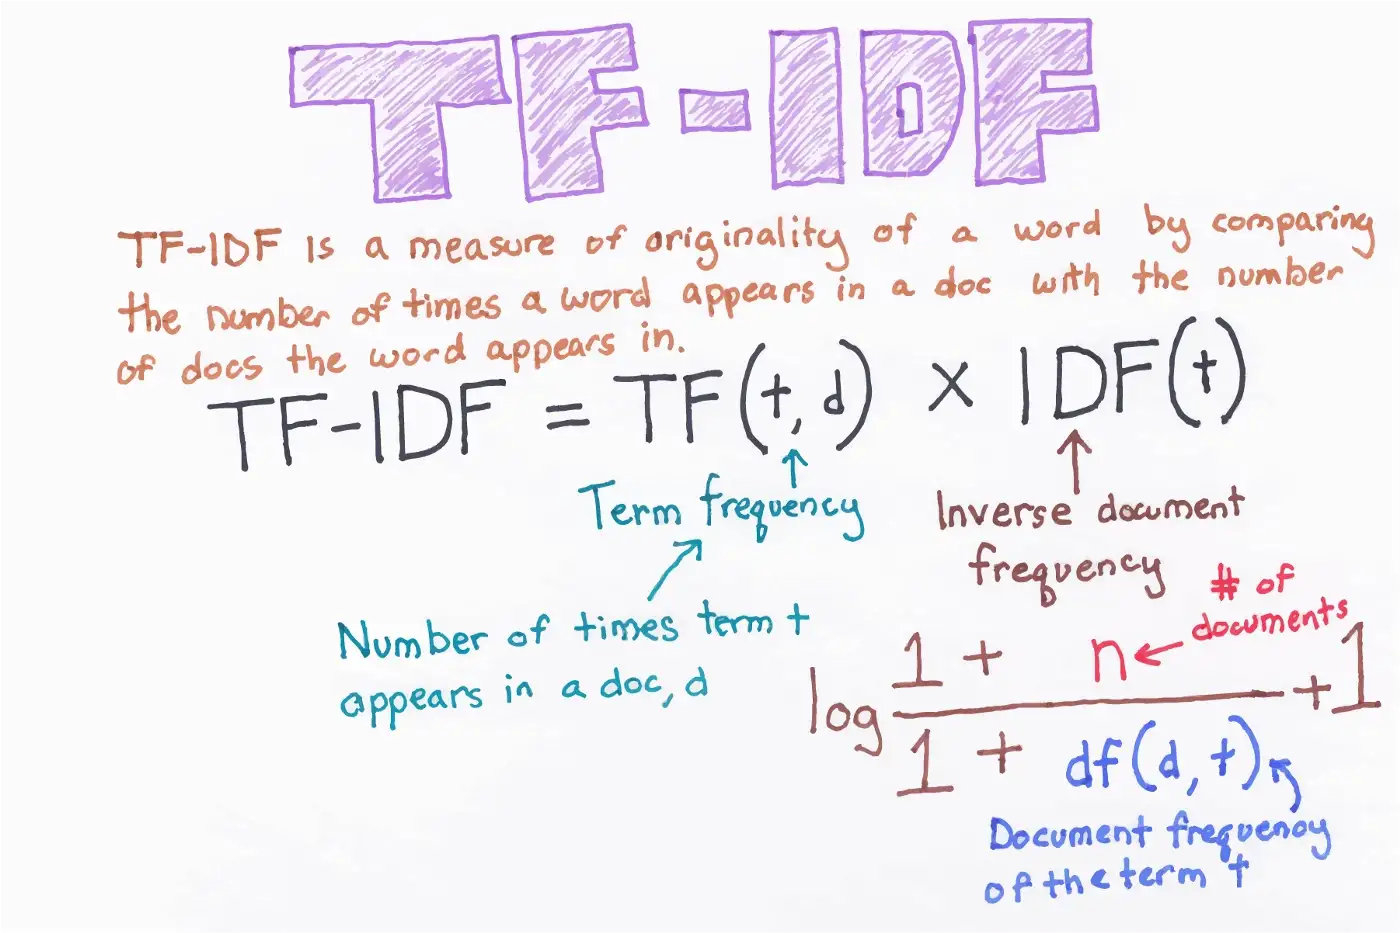

# Advantages

    1.If the word is rare in the corpus, it will be given more importance. (i.e. IDF)
    2.If the word is more frequent in a document, it will be given more importance. (i.e. TF)

# Disadvantages

    Same as BOW

In [36]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(df.clean_text_lemma)

In [37]:
print(vectorizer.vocabulary_)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}


In [38]:
print(dtm.toarray()) 

# convert sparse matrix to nparray

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [39]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


# Latent Space

A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in which items which resemble each other more closely are positioned closer to one another in the latent space.

# Word Embeddings (Word Vectors)

In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.

Traditionally, one of the main limitations of word embeddings (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, polysemy and homonymy are not handled properly.

# Word2Vec

You shall know the word by the company it keeps." by JR Firth

Distributional Semantics (i.e. a word is characterized by the company it keeps)
W2v works well because there is an idea of meaning distribution in the context.

Algorithms to generate Word2Vec Embeddings

    1.SkipGram
    2.Continuous Bag of Words
    
    
Issue
Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is,

    Is it possible to segregate the three vectors to represent the words based in the context?
                                                OR
    Is it possible to disambiguate the word vectors based on the context?
    
Word2Vec is not capturing the contextual information. This is where BERT comes handy.

    ! pip install gensim
    ! pip install --upgrade gensim
Run this in command promp (admin mode)

In [42]:
! pip install --upgrade gensim

  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20445 sha256=36bccf0980f83f552a13d5b1f63f5bd9eb0d3220d4330ecad5523ff051701012
  Stored in directory: c:\users\bagal\appdata\local\pip\cache\wheels\99\66\48\d7ce0c6927f6abf167bbcdee537affc7b92c03632f78028411
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=eb654613fcf410c77a1f42a0fd6a39585b62d945a1a51e1edb4a905ea91a7e1f
  Stored in directory: c:\users\bagal\appdata\local\pip\cache\wheels\d9\c7\71\db1d4646d963b34c530667501d3d6f34c0825eaffae2f0f2cb
Successfully built fst-pso miniful
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [43]:
import gensim

print(gensim.__version__)

4.3.0


In [44]:
from gensim.models import Word2Vec

In [45]:
df['tokenised_sentences'] = df.clean_text_stem.apply(lambda sent : sent.split())

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


In [46]:
list(df.tokenised_sentences)

[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [47]:
# train model

model = Word2Vec(list(df.tokenised_sentences), vector_size=100, min_count=1)

In [48]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [49]:
# Total Documents
model.corpus_count

4

In [50]:
# Looking at the vocabulary

print(model.wv.key_to_index)

print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [51]:
# access the 100 dimensional vector for one of the words

print(model.wv.__getitem__('foolish'))

print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773187e-03 -6.8126465e-03 -1.3754654e-03
  7.6685809e-03  7.3464084e-03 -3.6732983e-03  2.6427007e-03
 -8.3171297e-03  6.2054847e-03 -4.6373224e-03 -3.1641079e-03
  9.3113566e-03  8.7338447e-04  7.4907015e-03 -6.0740639e-03
  5.1605059e-03  9.9228211e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648384e-03 -4.8626517e-03 -3.7785650e-03 -8.5362010e-03
  7.9556061e-03 -4.8439382e-03  8.4236125e-03  5.2625705e-03
 -6.5500261e-03  3.9578700e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257271e-03 -1.5815735e-03
 -4.0343284e-04  3.2996845e-03  1.4418793e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936899e-03
  3.9735888e-03  4.5294715e-03  1.4343048e-03 -2.6998566e-03
 -4.3668128e-03 -1.0320758e-03  1.4370275e-03 -2.6460099e-03
 -7.0737838e-03 -7.8053069e-03 -9.1217877e-03 -5.9351707e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606713e-03 -3.7173224e-03
  4.2891572e-03 -3.7390448e-03  8.3781742e-03  1.5339922e-03
 -7.2423196e-03  9.43379

In [52]:
# Access the 100D vectors for all 6 words

print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
  -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
  -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
  -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
   8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
  -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
   4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
  -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
   4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.3985079e-03
  -1.5776539e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [53]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(6, 100)


In [54]:
# save model
# model.save('model/first_word_vectors.bin')

# # load model
# new_model = Word2Vec.load('model/first_word_vectors.bin')
# print(new_model)

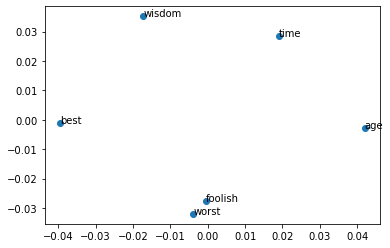

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model.wv.__getitem__(model.wv.index_to_key)
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [56]:
model.wv.similarity('best', 'worst')

0.13887984

In [57]:
model.wv.most_similar('foolish')

[('worst', 0.17018885910511017),
 ('best', 0.06408977508544922),
 ('wisdom', -0.01351495273411274),
 ('time', -0.023671677336096764),
 ('age', -0.05234675854444504)]

In [58]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


# Sentence Embedding (Document Vectors)

In [59]:
# Remove out-of-vocabulary words

sentence = ['best', 'bansal', 'time', 'kanav']

vocab_tokens = [word for word in sentence if word in model.wv.index_to_key]

vocab_tokens

['best', 'time']

In [60]:
# Create document vectors by averaging word vectors

np.mean(model.wv.__getitem__(vocab_tokens), axis=0)

array([-8.67358595e-03,  2.89794919e-03,  2.15816963e-03, -1.78857567e-03,
       -9.80613288e-04, -3.78919719e-03,  2.76901107e-03,  4.87567671e-03,
       -4.66937292e-03, -6.52329577e-03, -2.70481827e-03, -5.32789715e-03,
       -6.42515067e-03, -1.24939065e-03,  3.04454588e-04, -5.68586634e-04,
        3.80685320e-04,  9.29906499e-04, -3.06664710e-03, -1.13440270e-03,
       -3.30431201e-03, -2.62711640e-03,  8.27061944e-03, -1.08386762e-03,
       -2.20737420e-04, -3.76207754e-04, -9.07141017e-04, -2.58626812e-03,
       -1.31568930e-04,  6.61792420e-03,  7.85563514e-03, -6.56275358e-03,
       -2.55824206e-03, -6.91789947e-03,  1.94838876e-03,  6.02512946e-03,
        6.43219100e-03,  5.58420178e-03,  7.29977898e-03,  3.01524997e-03,
        8.72512534e-03, -7.17296451e-03, -8.21312703e-03, -1.31057145e-03,
       -1.93920126e-03,  2.33910559e-03,  2.67299288e-03,  2.97158002e-03,
        4.06721811e-04,  8.25488823e-05,  5.28098457e-03, -8.93464498e-03,
        3.82513623e-03,  

In [61]:
np.mean(model.wv.__getitem__(vocab_tokens), axis=0).shape

(100,)

In [62]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [63]:
df['doc_vector_w2v'] = df.tokenised_sentences.apply(lambda x : document_vector(x, model.wv))

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673586, 0.0028979492, 0.0021581696, -0...."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0...."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.004389453, 0.0047678924, 0.0024528443, 0.0..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568744, -0.0008546484, ..."


# Pretrained GloVe Embeddings

In [64]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.3.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [65]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [66]:
# Approax 200MB Size
# Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')

In [67]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [68]:
# Vocabulary Size and Word Embedding Shape

print(len(wv.index_to_key))

print(wv.__getitem__("school").shape)

1193514
(50,)


In [69]:
wv.most_similar("developer", topn=5)

[('sharepoint', 0.8866323828697205),
 ('administrator', 0.8673086166381836),
 ('programmer', 0.861934244632721),
 ('architect', 0.8591458201408386),
 ('oracle', 0.8557209372520447)]

In [70]:
wv.similarity("developer", "development")

0.7817412

In [71]:
wv.__getitem__('college')

array([ 1.7885  , -0.067292,  0.46616 , -0.81783 ,  0.10752 ,  0.30621 ,
        1.4632  , -0.12453 , -0.10154 , -0.23087 , -0.572   ,  0.086826,
       -4.051   ,  0.85883 ,  0.71311 , -0.049015, -0.51012 ,  0.22284 ,
       -0.98466 ,  0.78809 ,  0.53688 ,  0.17593 ,  0.26659 , -0.86271 ,
        0.051508,  0.29894 ,  0.74473 , -0.85046 , -0.32939 , -0.31356 ,
        0.63817 , -1.1198  , -0.1482  , -0.46216 ,  0.046157, -0.46282 ,
       -0.32383 ,  1.5272  ,  0.76098 , -0.1311  , -0.35028 ,  0.51516 ,
       -0.07257 ,  0.2536  ,  0.5363  , -0.46969 ,  0.3285  ,  0.17779 ,
       -0.47109 ,  0.37841 ], dtype=float32)

# Semantic regularities captured in word embeddings

In [72]:
wv.similarity("college", "school")

0.8894185

In [73]:
wv.similarity("college", "university")

0.8116428

In [74]:
wv.similarity("college", "apple")

0.39391714

In [75]:
wv.most_similar("college", topn=5)

[('school', 0.8894184231758118),
 ('student', 0.8599385619163513),
 ('class', 0.8441340327262878),
 ('classes', 0.8319132924079895),
 ('basketball', 0.8274194002151489)]

In [76]:
wv.most_similar("mango", topn=5)

[('yogurt', 0.8689920902252197),
 ('coconut', 0.8518491387367249),
 ('strawberry', 0.8414680361747742),
 ('fanta', 0.8399896621704102),
 ('mocha', 0.8393072485923767)]

In [77]:
wv.most_similar(positive=['college', 'university'], topn=5)

[('student', 0.8731303811073303),
 ('students', 0.8377566337585449),
 ('schools', 0.8342148065567017),
 ('campus', 0.8218969702720642),
 ('cambridge', 0.8131343126296997)]

In [78]:
wv.most_similar(positive=['student', 'class'], negative=['college'], topn=3)

[('teacher', 0.8359394073486328),
 ('form', 0.8157238364219666),
 ('study', 0.8039187788963318)]

In [79]:
print(wv.doesnt_match(['college', 'university', 'school', 'student', 'apple']))

apple


In [80]:
words = ['college', 'mango', 'school','student','class', 'strawberry', 'coconut']

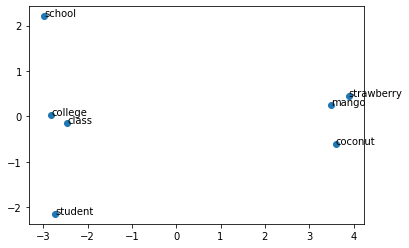

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array([wv[word] for word in words])
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# Sentence Embedding from Pretrained Model (Document Vectors)

In [82]:
def document_vector_pretrained(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [83]:
df['doc_vector_pretrained_glove'] = df.tokenised_sentences.apply(lambda x : document_vector_pretrained(x, wv))

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v,doc_vector_pretrained_glove
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673586, 0.0028979492, 0.0021581696, -0....","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.004389453, 0.0047678924, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568744, -0.0008546484, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,..."


# Word2Vec vs BERT

Embeddings

    Word2Vec offers pre-trained word embeddings that anyone can use off-the-shelf. The embeddings are key: value pairs, essentially 1-1 mappings between words and their respective vectors. Word2Vec takes a single word as input and outputs a single vector representation of that word.

Since BERT generates contextual embeddings, it takes as input a sequence (usually a sentence) rather than a single word. BERT needs to be shown the context that surrounding words provide before it can generate a word embedding. With BERT, you do need to have the actual model as the vector representations of words will vary based on the specific sequences you’re inputting. The output is a fixed-length vector representation of the input sentence.

BERT or Bidirectional Encoder Representations from Transformers, is a technique that allows for bidirectional training of Transformers for natural language modeling tasks. Language models which are bidirectionally trained can learn deeper context from language than single-direction models. BERT generates context aware embeddings that allow for multiple representations (each representation, in this case, is a vector) of each word based on a given word’s context.

Word Ordering 

    Word2Vec embeddings do not take into account the word position.

    BERT model explicitly takes as input the position (index) of each word in the sentence before calculating its embedding.

Out-of-Vocabulary

    Since Word2Vec learns embeddings at word level, it can only generate embeddings for words that existed in it’s training set (aka it’s “vocabulary space”). This is a major drawback to Word2Vec - that it just doesn’t support Out-of-Vocabulary words.

    Alternatively, BERT learns representations at the subword level, so a BERT model will have a smaller vocabulary space than the number of unique words in its training corpus. In turn, BERT is able to generate embeddings for words outside of its vocabulary space giving it a near infinite vocabulary.

# Sentence BERT (SBERT)

! pip install -U sentence-transformers

Sentence BERT References:
    
    https://www.sbert.net/index.html
    https://www.sbert.net/docs/pretrained_models.html

Find the paper for Sentence BERT here: https://arxiv.org/pdf/1908.10084.pdf

BERT (Devlin et al., 2018) and RoBERTa (Liu et al., 2019) has set a new state-of-the-art performance on sentence-pair regression tasks like semantic textual similarity (STS). However, it requires that both sentences are fed into the network, which causes a massive computational overhead: Finding the most similar pair in a collection of 10,000 sentences requires about 50 million inference computations (~65 hours) with BERT. The construction of BERT makes it unsuitable for semantic similarity search as well as for unsupervised tasks like clustering.

Sentence-BERT (SBERT), a modification of the pretrained BERT network that use siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. This reduces the effort for finding the most similar pair from 65 hours with BERT / RoBERTa to about 5 seconds with SBERT, while maintaining the accuracy from BERT.



Usage

    Computing Sentence Embeddings
    Semantic Textual Similarity
    Semantic Search
    Retrieve and Re-Rank
    Clustering
    Paraphrase Mining
    Translated Sentence Mining
    Cross Encoders
    Image Search

In [85]:
! pip install -U sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=85bf79736fd0ee773da0d757c61feb566216856d4e9b3c2711f27a40be9ec25e
  Stored in directory: c:\users\bagal\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [86]:
from sentence_transformers import SentenceTransformer, util

In [87]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

# Model Overview

    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('model_name')

All models are hosted on the HuggingFace Model Hub.

The following table provides an overview of (selected) models. They have been extensively evaluated for their quality to embedded sentences (Performance Sentence Embeddings) and to embedded search queries & paragraphs (Performance Semantic Search).

The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality. Toggle All models to see all evaluated models or visit HuggingFace Model Hub to view all existing sentence-transformers models.

# Model Name

all-mpnet-base-v2

    Description: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
    Dimensions: 768
    Suitable Score Functions: dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
    Size: 420 MB
    Training Data: 1B+ training pairs. For details, see model card.
    Model Card: https://huggingface.co/sentence-transformers/all-mpnet-base-v2

multi-qa-mpnet-base-dot-v1

    Description: This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.
    Dimensions: 768
    Suitable Score Functions: dot-product (util.dot_score)
    Size: 420 MB
    Training Data: 215M (question, answer) pairs from diverse sources.
    Model Card: https://huggingface.co/sentence-transformers/multi-qa-mpnet-base-dot-v1

all-distilroberta-v1

    Description: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
    Dimensions: 768
    Suitable Score Functions: dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
    Size: 290 MB
    Training Data: 1B+ training pairs. For details, see model card.
    Model Card: https://huggingface.co/sentence-transformers/all-distilroberta-v1

all-MiniLM-L6-v2

    Description: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
    Dimensions: 384
    Suitable Score Functions: dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
    Size: 80 MB
    Training Data: 1B+ training pairs. For details, see model card.
    Model Card: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

List of Pretrained models available:
    
    all-MiniLM-L12-v2
    multi-qa-distilbert-cos-v1
    multi-qa-MiniLM-L6-cos-v1
    multi-qa-MiniLM-L6-cos-v1
    paraphrase-multilingual-mpnet-base-v2
    paraphrase-albert-small-v2
    paraphrase-multilingual-MiniLM-L12-v2
    paraphrase-MiniLM-L3-v2
    distiluse-base-multilingual-cased-v1
    distiluse-base-multilingual-cased-v2

In [90]:
# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173748e-02 -4.28515524e-02 -1.56286340e-02  1.40537247e-02
  3.95537578e-02  1.21796273e-01  2.94333920e-02 -3.17524076e-02
  3.54959816e-02 -7.93139860e-02  1.75878499e-02 -4.04369980e-02
  4.97259349e-02  2.54912488e-02 -7.18700886e-02  8.14968571e-02
  1.47073052e-03  4.79627326e-02 -4.50336188e-02 -9.92174745e-02
 -2.81769857e-02  6.45046160e-02  4.44670394e-02 -4.76217009e-02
 -3.52952369e-02  4.38671596e-02 -5.28566092e-02  4.33036505e-04
  1.01921476e-01  1.64072067e-02  3.26996371e-02 -3.45986634e-02
  1.21339252e-02  7.94870928e-02  4.58343141e-03  1.57778300e-02
 -9.68204997e-03  2.87625641e-02 -5.05806319e-02 -1.55793764e-02
 -2.87906770e-02 -9.62280855e-03  3.15556899e-02  2.27348879e-02
  8.71449560e-02 -3.85027118e-02 -8.84718224e-02 -8.75498727e-03
 -2.12343428e-02  2.08923519e-02 -9.02078003e-02 -5.25732227e-02
 -1.05638849e-02  2.88310796e-02 -1.61455162e-02  6.17836276e-03
 -1.23234

In [91]:
embeddings.shape

(3, 384)

In [92]:
emb1 = model.encode("I am eating Mango")
emb2 = model.encode("I like fruits")
emb3 = model.encode("I work at Microsoft")
cos_sim_12 = util.cos_sim(emb1, emb2)
cos_sim_13 = util.cos_sim(emb1, emb3)
print("Cosine-Similarity between 1 and 2:", cos_sim_12)
print("Cosine-Similarity between 1 and 3:", cos_sim_13)

Cosine-Similarity between 1 and 2: tensor([[0.4914]])
Cosine-Similarity between 1 and 3: tensor([[0.1904]])


In [93]:
sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

cos_sim

tensor([[ 1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
          0.0630],
        [ 0.7553,  1.0000, -0.0610,  0.1442, -0.0809, -0.0216,  0.1157,  0.0362,
          0.0216],
        [-0.1050, -0.0610,  1.0000, -0.1088,  0.0217, -0.0413, -0.0928,  0.0231,
          0.0247],
        [ 0.2474,  0.1442, -0.1088,  1.0000, -0.0348,  0.0362,  0.7369,  0.0821,
          0.1389],
        [-0.0704, -0.0809,  0.0217, -0.0348,  1.0000, -0.1654, -0.0592,  0.1961,
          0.2564],
        [-0.0333, -0.0216, -0.0413,  0.0362, -0.1654,  1.0000,  0.0769, -0.0380,
         -0.0895],
        [ 0.1707,  0.1157, -0.0928,  0.7369, -0.0592,  0.0769,  1.0000,  0.0495,
          0.1191],
        [ 0.0476,  0.0362,  0.0231,  0.0821,  0.1961, -0.0380,  0.0495,  1.0000,
          0.6433],
        [ 0.0630,  0.0216,  0.0247,  0.1389,  0.2564, -0.0895,  0.1191,  0.6433,
          1.0000]])

In [94]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v,doc_vector_pretrained_glove
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673586, 0.0028979492, 0.0021581696, -0....","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.004389453, 0.0047678924, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568744, -0.0008546484, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,..."


In [95]:
df['doc_vector_pretrained_bert'] = df['clean_text_lemma'].apply(model.encode)

In [96]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v,doc_vector_pretrained_glove,doc_vector_pretrained_bert
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673586, 0.0028979492, 0.0021581696, -0....","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431...","[-0.09242823, 0.032537512, -0.018796416, -0.03..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0...","[-0.07362389, 0.07536218, 0.0055896156, 0.0316..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.004389453, 0.0047678924, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70...","[0.02470783, 0.14167036, 0.012471458, 0.063883..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568744, -0.0008546484, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,...","[0.054718714, 0.13996212, 0.05851771, -0.00338..."
